# **2023**

## ***Jun 8 2023***

Энергия Kch для одного захода без точки пучка в фите и с ней:
<div>
<img src="PictureDump/KchEnergy_NoBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
<img src="PictureDump/KchEnergy_WithBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
</div>

Импульс Kch для одного захода без точки пучка в фите и с ней:
<div>
<img src="PictureDump/KchMom_NoBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
<img src="PictureDump/KchMom_WithBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
</div>

## ***Jun 9 2023***

MC KsKl with shifted up by 30 keV energy (aka WrongEnergy) Mass:
<div>
<img src="PictureDump/KsMass_WrongEnergy.png" alt="Drawing" style="width: 700px;"/>
</div>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

E = np.array([508.5, 509, 509.5, 510, 510.5, 511])
M_RCNC = np.array([497.575, 497.582, 497.588, 497.588, 497.588, 497.593])
M_RCNC_err = np.array([0.002, 0.002, 0.003, 0.003, 0.003, 0.003])

M_fit = curve_fit(lambda x, a: a, E, M_RCNC, sigma=M_RCNC_err)
print("M_fit =", np.round(M_fit[0][0], 3), "MeV")

# plt.errorbar(x=E, y=M_RCNC, yerr=M_RCNC_err, fmt='.')
# plt.show()

M_fit = 497.584 MeV


## ***Jun 10 2023***

Energy control via $K^{\pm}$ without beam point:

In [ ]:
energy_points = np.array([510])
E_Kch_exp = np.array([])
E_Kch_exp_Err = np.array([])

emeas_MC = np.array([509.95])
emeas_MC_err = np.array([0.007])
E_Kch_MC = np.array([506.249])
E_Kch_MC_Err = np.array([0.005])

## ***Jun 13 2023***

$\Delta E$ data - MC with and without beam point:
<div>
<img src="PictureDump/deltaE_dataMC_diff_withBeamPoint.png" alt="Drawing" style="width: 550px;"/>
<img src="PictureDump/deltaE_dataMC_diff_noBeamPoint.png" alt="Drawing" style="width: 550px;"/>
</div>

## ***Jun 14***

ISR radiative correction pretty much has no difference with or without energy spread. Previous RC is still good.

In [2]:
import numpy as np

energies = np.array([508, 508.5, 510])
RC_MC = np.array([0.082, 0.078, 0.106])
RC_smeared_MC = np.array([0.084, 0.078, 0.110])

m = np.array(
    [497.577, 497.568, 497.533, 497.554, 497.544, 497.57, 497.589, 497.568, 497.604]
)
RC = np.array([0.1, 0.099, 0.089, 0.08, 0.071, 0.116, 0.191, 0.334, 1.453])
print(list(np.round(m + RC, 3)))

[497.677, 497.667, 497.622, 497.634, 497.615, 497.686, 497.78, 497.902, 499.057]


I've started working on PhiMesonFit. 
There are some params for $e^+ e^- \rightarrow \phi \rightarrow K_S K_L$ for RHO2018 season.

## ***Jun 19***

Trying to *guess* the $\Delta E$ by minimizing spread (relative to mean value) of $M_{vis}(E) - \Delta M_{RC}(E + \Delta E)$:

We think $\Delta E = 96$ keV

In [2]:
import numpy as np
from matplotlib import pyplot as ppt
from scipy import optimize as opt

import sys
sys.path.append('C:\\work\\Science\\BINP\\Kaon Mass Measure')
from AuxScripts.EnergyShift import Shift

    
M_RCNC = np.array([497.577, 497.568, 497.533, 497.554, 497.544, 497.57, 497.589, 497.568, 497.604])
err_M = np.array([0.036, 0.014, 0.011, 0.008, 0.007, 0.01, 0.013, 0.014, 0.029])
# err_M = np.array([0.028, 0.01, 0.004, 0.004, 0.002, 0.002, 0.004, 0.007, 0.027])
RC_data = np.array([0.1, 0.099, 0.089, 0.08, 0.071, 0.116, 0.191, 0.334, 1.453])
E = np.array([504.8, 507.862, 508.404, 508.957, 509.528, 509.956, 510.458, 511.035, 513.864])
M_vis = np.round(M_RCNC + RC_data, 3)

shift = Shift(M_vis, err_M, RC_data, E)

delta_E, deltaE_err = shift.Get_Shift()
print("$\Delta E=$", delta_E, "+/-", deltaE_err, "MeV")

M_fit, err = shift.Get_Mass_fit()
print("M_fit =", M_fit, "+/-", err, "MeV")
print("M_new =", list(shift.Get_corrected_mass()))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.002027681008206999
        x: [ 9.707e-02]
      nit: 4
      jac: [-3.370e-07]
 hess_inv: [[ 1.732e+00]]
     nfev: 10
     njev: 5
$\Delta E=$ 0.096 +/- 0.033 MeV
M_fit = 497.55 +/- 0.004 MeV
M_new = [497.575, 497.57, 497.534, 497.557, 497.538, 497.557, 497.569, 497.541, 497.555]


## ***Jun 20***

In [46]:
import numpy as np

M_vis = np.array([497.766, 497.739, 497.706, 497.707, 497.711, 497.776, 497.855, 497.981, 499.148])
M_RCNC = np.round(M_vis - shift.Get_RC(E + delta_E), 3)
print("M_RCNC =", list(M_RCNC))

M_fit, err = opt.curve_fit(lambda x, a: a, E, M_RCNC, sigma=err_M)
print("M_RCNC_fit =", np.round(M_fit[0], 3), "+/-", np.round(np.sqrt(np.diag(err))[0], 3), "MeV")

M_RCNC = [497.664, 497.642, 497.618, 497.63, 497.634, 497.647, 497.644, 497.619, 497.645]
M_RCNC_fit = 497.634 +/- 0.003 MeV


I splined ISR correction (Get_RC function) and fitted the function* to a M_vis data. 
So $\Delta E = 0.096 \pm 0.033$ MeV was obtained. 

*: M(E| $M_{mean}$, $\Delta E$) = $M_{mean}$ + Get_RC(E + $\Delta E$)

$M_{vis}$ (black), $\Delta M_{RC} + 497.550$ (blue) vs $E^{(mean)}_{compton}$
<div>
<img src="PictureDump/Mvis_RC.png" alt="Drawing" style="width: 850px;"/>
</div>

After 96 kev energy shift and applying corresponding ISR corrections: 

<div>
<img src="PictureDump/KsMassExp_CorrectedEnergy.png" alt="Drawing" style="width: 850px;"/>
</div>

## ***Jun 21***

Reprocessed data (without Kl cluster cut). 

eff = [0.0697, 0.1019, 0.1169, 0.131, 0.1325, 0.1347, 0.1372, 0.1375, 0.1383, 0.1403, 0.1399, 0.1424]
sigma_vis = [0.568, 1.6317, 3.0119, 37.9855, 68.9547, 121.7992, 180.229, 178.9924, 146.8741, 90.1184, 70.3458, 27.91]
sigma_vis (efficiency accounted)= [8.1477, 16.0147, 25.7736, 289.9972, 520.4535, 903.9243, 1313.3304, 1301.9492, 1061.6803, 642.3569, 502.6593, 196.0491]
sigma^(err)_vis = [0.033, 0.036, 0.082, 0.273, 0.237, 0.393, 0.305, 0.345, 0.424, 0.369, 0.378, 0.238]


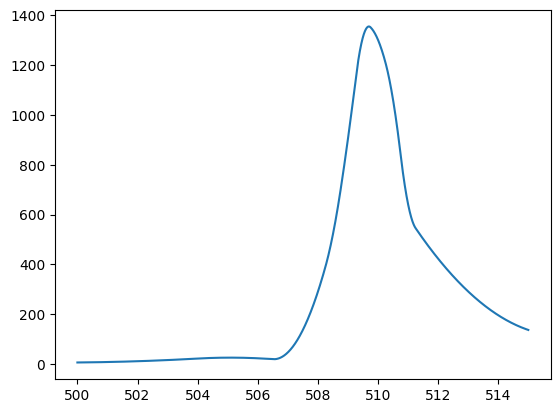

In [4]:
import numpy as np
import matplotlib.pyplot as ppl
import sys
sys.path.append('C:\\work\\Science\\BINP\\Kaon Mass Measure')
from PhiMesonFit.xsection import Xsection

E = np.array([501, 503, 505, 508, 508.5, 509, 509.5, 510, 510.5, 511, 511.5, 514])
lumi = np.array([519.365, 1232.43, 454.856, 548.972, 1395.09, 979.506, 2621.62, 2041.31, 1053.46, 780.307, 561.27, 520.924])
lumi_err = np.array([0.996744, 1.54306, 0.94111, 1.0394, 1.6559, 1.38908, 2.27821, 2.01353, 1.44786, 1.24862, 1.06109, 1.02696])

e_MC = np.array([0.100742, 0.14724, 0.168875, 0.189286, 0.191459, 0.194718, 0.19831, 0.198671, 0.199915, 0.202736, 0.202236, 0.205726])
B_Kpipi = 0.692
efficiency = e_MC * B_Kpipi

n_events = np.array([295, 2011, 1370, 20853, 96198, 119303, 472492, 365379, 154726, 70320, 39483, 14539])

xsec_vis = n_events / lumi
xsec_vis_err = np.sqrt( (np.sqrt(n_events) / lumi)**2 + (n_events / (lumi**2))**2 * lumi_err**2 )
xsec = n_events / lumi / efficiency

print("eff =", list(np.round(efficiency, 4)))
print("sigma_vis =", list(np.round(n_events / lumi, 4)))
print("sigma_vis (efficiency accounted)=", list(np.round(xsec, 4)))
print("sigma^(err)_vis =", list(np.round( xsec_vis_err, 3)) )

vis_xsection = Xsection(np.array(E), xsec, (500, 515))
a, b = vis_xsection.Get_Data()

ppl.plot(a, b)
ppl.show()